<a href="https://colab.research.google.com/github/nalrob/Procesamiento_de_datos/blob/main/Practica_3_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 3.


Visualización preliminar de los datos. Mencionen las conclusiones que tienen después de hacer este análisis visual. (Es diferente a la idea inicial que tenían de los datos.  Cambia el objetivo final que tenían al iniciar el procesamiento)

In [1]:
from google.colab import files
uploaded= files.upload()

Saving FIRE_images_zip.zip to FIRE_images_zip.zip
Saving Nuevo.zip to Nuevo.zip


In [2]:
!pwd

/content


In [3]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['Nuevo.zip']),'r')
data.extractall()

data2=zipfile.ZipFile(io.BytesIO(uploaded['FIRE_images_zip.zip']),'r')
data2.extractall()

In [4]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import load_img


sns.set_style('darkgrid')

In [5]:
from PIL import Image

# Lista de carpetas de imágenes y sus etiquetas
folders = [

    ("/content/fire_images", "fire"),
    ("/content/non_fire_images", "non_fire"),
    ("/content/Nuevo/fire_images", "fire"),
    ("/content/Nuevo/non_fire_images", "non_fire"),
]

dfs = []


for folder_path, label in folders:
    data = []
    for dirname, _, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Ajusta las extensiones permitidas
                img_path = os.path.join(dirname, filename)
                data.append({'path': img_path, 'label': label})
    df_temp = pd.DataFrame(data)
    dfs.append(df_temp)


df = pd.concat(dfs, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)


print(df.head(10))


                                        path     label
0       /content/Nuevo/fire_images/00843.jpg      fire
1  /content/non_fire_images/non_fire.204.png  non_fire
2   /content/Nuevo/non_fire_images/00437.jpg  non_fire
3       /content/Nuevo/fire_images/01087.jpg      fire
4       /content/Nuevo/fire_images/00858.jpg      fire
5       /content/Nuevo/fire_images/00351.jpg      fire
6          /content/fire_images/fire.150.png      fire
7   /content/non_fire_images/non_fire.25.png  non_fire
8   /content/non_fire_images/non_fire.93.png  non_fire
9           /content/fire_images/fire.49.png      fire


## **Analisis descriptivo**

In [6]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['darkorange','green'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(
     values=df['label'].value_counts().to_numpy(),
     labels=df['label'].value_counts().index,
    marker=dict(colors=['darkorange','green'])),
    row=1, col=2)

Visualización de grupos

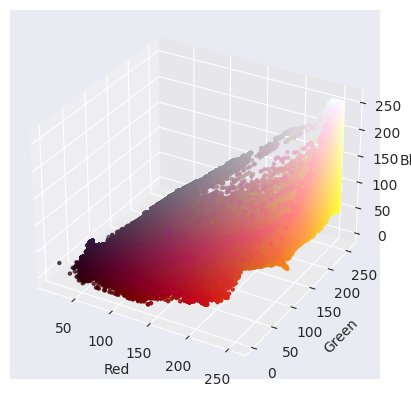

In [20]:
import cv2
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

fire_images = []
non_fire_images = []


for index, row in df.iterrows():
    image_path = row['path']
    label = row['label']
    img = cv2.imread(image_path)


    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if label == 'fire':
            fire_images.append(img_rgb)
        elif label == 'non_fire':
            non_fire_images.append(img_rgb)

r, g, b = cv2.split(fire_images[0])
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = fire_images[0].reshape((fire_images[0].shape[0] * fire_images[0].shape[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

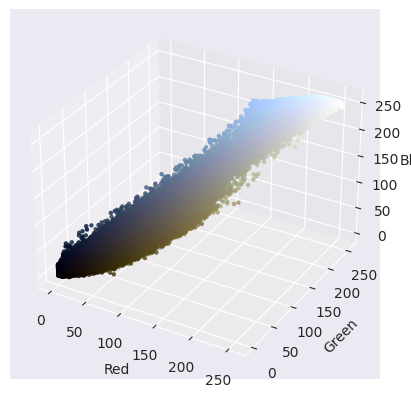

In [21]:
r, g, b = cv2.split(non_fire_images[0])
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = non_fire_images[0].reshape((non_fire_images[0].shape[0] * non_fire_images[0].shape[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Distribución de catacteristicas de tamaño

In [ ]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(500)

,path,label,height,width
0,/content/fire_images/fire.20.png,fire,450,700
1,/content/non_fire_images/non_fire.145.png,non_fire,531,800
2,/content/fire_images/fire.190.png,fire,178,250
3,/content/Nuevo/fire_images/01074.jpg,fire,1080,1920
4,/content/non_fire_images/non_fire.200.png,non_fire,249,292
...,...,...,...,...
495,/content/non_fire_images/non_fire.225.png,non_fire,450,600
496,/content/Nuevo/fire_images/00284.jpg,fire,1080,1920
497,/content/non_fire_images/non_fire.78.png,non_fire,563,1000
498,/content/Nuevo/fire_images/01233.jpg,fire,1080,1920


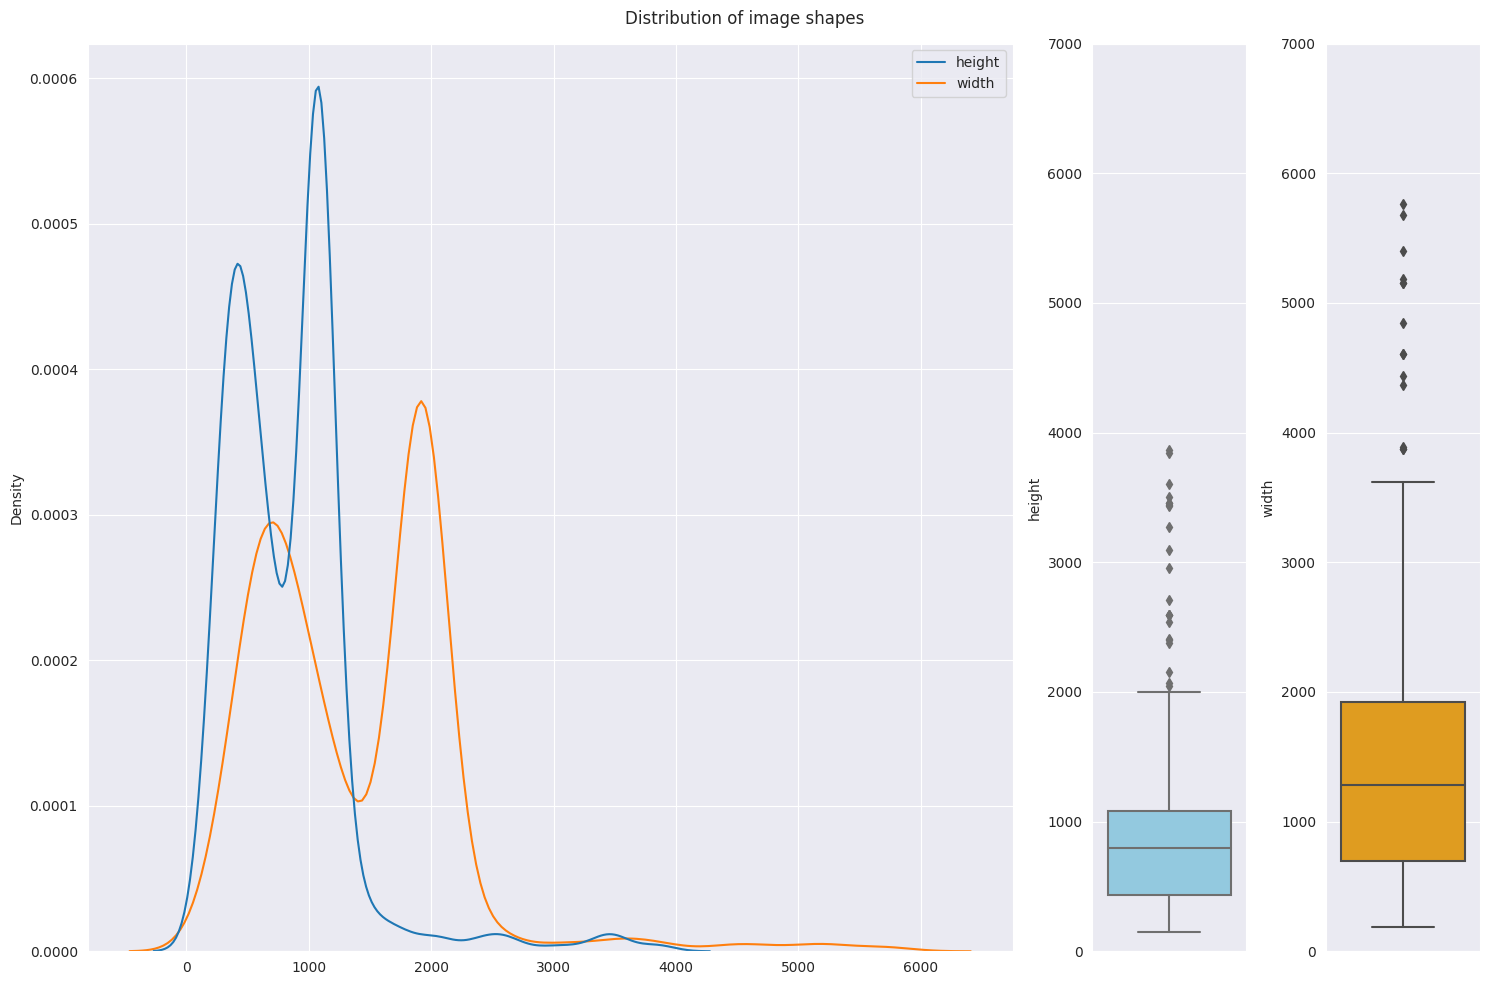

In [ ]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

# **Preprocesamiento**

Vectorización

In [ ]:
label_mapping = {"fire": 0, "non_fire": 1}

df['label'] = df['label'].replace(label_mapping)
df['label'] = df['label'].fillna(0).astype(int)

print(df[['path', 'label']])


                                          path  label
0             /content/fire_images/fire.20.png      0
1    /content/non_fire_images/non_fire.145.png      1
2            /content/fire_images/fire.190.png      0
3         /content/Nuevo/fire_images/01074.jpg      0
4    /content/non_fire_images/non_fire.200.png      1
..                                         ...    ...
733       /content/Nuevo/fire_images/00950.jpg      0
734          /content/fire_images/fire.270.png      0
735       /content/Nuevo/fire_images/01076.jpg      0
736           /content/fire_images/fire.57.png      0
737          /content/fire_images/fire.121.png      0

[738 rows x 2 columns]


In [ ]:
import PIL
import cv2

X, y = [], []

for index, row in df.iterrows():
    image_path = row['path']
    label = row['label']


    img = cv2.imread(image_path)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (48, 48))
        X.append(img)
        y.append(label)

In [ ]:
import numpy
X_samp = numpy.array(X)
y_samp = numpy.array(y)

X_samp = (X_samp/255)
X_samp.shape

(737, 48, 48, 3)

In [ ]:
X_samp

array([[[[0.01960784, 0.01568627, 0.00784314],
         [0.02352941, 0.01176471, 0.00784314],
         [0.03137255, 0.00784314, 0.00784314],
         ...,
         [0.47058824, 0.0627451 , 0.02352941],
         [0.57254902, 0.08627451, 0.00784314],
         [0.66666667, 0.14117647, 0.03529412]],

        [[0.01960784, 0.01568627, 0.00784314],
         [0.02352941, 0.01568627, 0.00784314],
         [0.03137255, 0.00784314, 0.00784314],
         ...,
         [0.49803922, 0.06666667, 0.01568627],
         [0.60784314, 0.10196078, 0.01568627],
         [0.70588235, 0.16078431, 0.05882353]],

        [[0.01960784, 0.01568627, 0.00784314],
         [0.01960784, 0.01568627, 0.00784314],
         [0.02745098, 0.01176471, 0.00784314],
         ...,
         [0.46666667, 0.04705882, 0.00784314],
         [0.63921569, 0.12156863, 0.02352941],
         [0.7372549 , 0.19607843, 0.08235294]],

        ...,

        [[0.03137255, 0.00784314, 0.00784314],
         [0.03137255, 0.00784314, 0.00784314]

Extracción de Pixeles

In [23]:
df['pixels'] = None


for index, row in df.iterrows():
    image_path = row['path']

    img = cv2.imread(image_path)

    # Verificar si la carga de la imagen fue exitosa
    if img is not None:
        df.at[index, 'pixels'] = img

print(df[['path', 'label','pixels' ]])

                                          path     label  \
0         /content/Nuevo/fire_images/00843.jpg      fire   
1    /content/non_fire_images/non_fire.204.png  non_fire   
2     /content/Nuevo/non_fire_images/00437.jpg  non_fire   
3         /content/Nuevo/fire_images/01087.jpg      fire   
4         /content/Nuevo/fire_images/00858.jpg      fire   
..                                         ...       ...   
733       /content/Nuevo/fire_images/01275.jpg      fire   
734       /content/Nuevo/fire_images/00377.jpg      fire   
735       /content/Nuevo/fire_images/01163.jpg      fire   
736          /content/fire_images/fire.175.png      fire   
737  /content/non_fire_images/non_fire.156.png  non_fire   

                                                pixels  
0    [[[255, 253, 255], [213, 206, 209], [204, 197,...  
1    [[[88, 62, 56], [142, 116, 110], [230, 204, 19...  
2    [[[75, 127, 109], [70, 122, 104], [62, 114, 96...  
3    [[[234, 217, 191], [234, 217, 191], [234, 217,